In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


status = ''

prices = pd.read_csv('price_data.csv')
prices.head()

# Each column is labeled with the Ticker symbol of another asset. Here's the translation:
#   VBTIX - Vanguard Total Bond Market Index Fund, a broad bond index ETF
#   GE    - Stock of General Electric
#   WMT   - Stock of Walmart
#   IBM   - Stock of IBM
#   SPX   - S&P 500 index, a broad US equity index




,Date,VBTIX,GE,WMT,IBM,SPX
0,1999-12-31,NaN,49.5795,69.1250,107.8750,1469.25
1,2000-01-03,NaN,48.0577,66.8750,115.6250,1455.22
2,2000-01-04,NaN,46.1955,64.2500,112.0625,1399.42
3,2000-01-05,NaN,45.9552,63.0000,116.0000,1402.11
4,2000-01-06,NaN,46.6710,63.6875,115.0000,1403.45


In [2]:
riskfree = pd.read_csv('tbill.csv')
riskfree.head()



,Date,TBILL
0,1999-12-31,5.17
1,2000-01-03,5.27
2,2000-01-04,5.27
3,2000-01-05,5.28
4,2000-01-06,5.25


In [3]:
# Merge the price and riskfree rate data into a single data set based on their date
# Hint: Do the 'Date' columns of both DataFrames have the same data type? Check with the .info() function
# of the DataFrames

observations = pd.merge(prices,riskfree)
observations.head()



,Date,VBTIX,GE,WMT,IBM,SPX,TBILL
0,1999-12-31,NaN,49.5795,69.1250,107.8750,1469.25,5.17
1,2000-01-03,NaN,48.0577,66.8750,115.6250,1455.22,5.27
2,2000-01-04,NaN,46.1955,64.2500,112.0625,1399.42,5.27
3,2000-01-05,NaN,45.9552,63.0000,116.0000,1402.11,5.28
4,2000-01-06,NaN,46.6710,63.6875,115.0000,1403.45,5.25


In [4]:
# Rename the 'TBILL' column into 'riskfree_rate'

observations = observations.rename(columns={'TBILL':'riskfree_rate'})
observations.head()


,Date,VBTIX,GE,WMT,IBM,SPX,riskfree_rate
0,1999-12-31,NaN,49.5795,69.1250,107.8750,1469.25,5.17
1,2000-01-03,NaN,48.0577,66.8750,115.6250,1455.22,5.27
2,2000-01-04,NaN,46.1955,64.2500,112.0625,1399.42,5.27
3,2000-01-05,NaN,45.9552,63.0000,116.0000,1402.11,5.28
4,2000-01-06,NaN,46.6710,63.6875,115.0000,1403.45,5.25


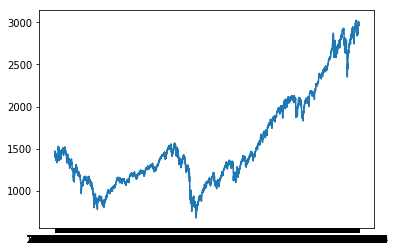

In [11]:

# Plot the evolution of the S&P 500 (= 'SPX') over time
#
plt.plot(observations['Date'],observations['SPX'])
plt.show()


# Check of intermediate result (1):
#
# HINT: Check for yourself: observations.loc[0, 'riskfree_rate'] should be 5.17


In [5]:
# HINT: Check for yourself: observations.loc[0, 'riskfree_rate'] should be 5.17
observations.loc[0, 'riskfree_rate']

5.17

In [8]:
#if status == 'SOLN':
#    Test.assertEquals(str(np.round(observations.loc[5, 'riskfree_rate'],2))[0:4], str(checker_results.loc[1, 'result']), 'Check 1 failed')



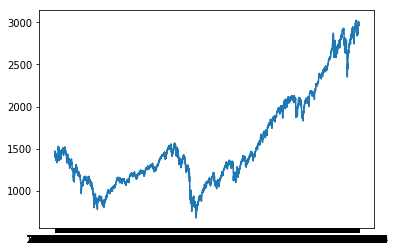

In [6]:
# Task 2: Asset Returns
# --------------------------

# Create a pandas DataFrame for returns. For the start, it'll only consist of the 'Date' column of the
# observations DataFrame
#
returns = pd.DataFrame()
returns['Date'] = observations['Date'].copy()
returns.head()

# Calculate log returns for all assets in the observations DataFrame, besides the 'riskfree_rate'.
# Store the results in the returns DataFrame.
# Hint: While it is not the only possible solution, the .shift() function of a pandas column might help you
#
returns['VBTIX'] = np.log(observations.VBTIX)-np.log(observations.VBTIX.shift())
returns['SPX'] = np.log(observations.SPX)-np.log(observations.SPX.shift())
returns['GE'] = np.log(observations.GE)-np.log(observations.GE.shift())
returns['WMT'] = np.log(observations.WMT)-np.log(observations.WMT.shift())
returns['IBM'] = np.log(observations.IBM)-np.log(observations.IBM.shift())

# Plot the return time series
# Q: Which charts look more similar to each other? Return Charts or Price Charts? Why?
# Return Charts

plt.plot(returns['Date'],observations['SPX'])
plt.show()



# Check of intermediate result (2):
#
# HINT: Check for yourself: returns.loc[1, 'GE'] should be -0.031175
#if status == 'SOLN':
#    Test.assertEquals(str(np.round(returns.loc[5, 'IBM'],4))[0:7], str(checker_results.loc[2, 'result']), 'Check 2 failed')



In [7]:

# Calculate the daily mean and standard deviation (= volatility) of the return series
# Hint: We're looking for the population standard deviation
#
returns_stats_daily = pd.DataFrame(index = ['VBTIX', 'GE', 'WMT', 'IBM', 'SPX'], columns = ['mean', 'std'])
returns_stats_daily.loc['VBTIX', 'mean'] = np.mean(returns.VBTIX)
returns_stats_daily.loc['GE', 'mean'] = np.mean(returns.GE)
returns_stats_daily.loc['WMT', 'mean'] = np.mean(returns.WMT)
returns_stats_daily.loc['IBM', 'mean'] = np.mean(returns.IBM)
returns_stats_daily.loc['SPX', 'mean'] = np.mean(returns.SPX)

returns_stats_daily.loc['VBTIX', 'std'] = np.std(returns.VBTIX)
returns_stats_daily.loc['GE', 'std'] = np.std(returns.GE)
returns_stats_daily.loc['WMT', 'std'] = np.std(returns.WMT)
returns_stats_daily.loc['IBM', 'std'] = np.std(returns.IBM)
returns_stats_daily.loc['SPX', 'std'] = np.std(returns.SPX)
returns_stats_daily

# Check of intermediate result (3):
#
# HINT: Check for yourself: returns_stats_daily.loc['VBTIX', 'mean'] should be 0.0000352
# HINT: Check for yourself: returns_stats_daily.loc['VBTIX', 'std'] should be 0.002799
#if status == 'SOLN':
#    Test.assertEquals(str(np.round(returns_stats_daily.loc['SPX', 'mean'],5))[0:8], str(checker_results.loc[3, 'result']), 'Check 3 failed')
#    Test.assertEquals(str(np.round(returns_stats_daily.loc['SPX', 'std'],4))[0:7], str(checker_results.loc[4, 'result']), 'Check 4 failed')




,mean,std
VBTIX,3.52072e-05,0.00279947
GE,-0.00033047,0.0193833
WMT,0.000104578,0.0146411
IBM,5.50579e-05,0.0159839
SPX,0.000136125,0.0117387


In [8]:
returns_stats_daily


,mean,std
VBTIX,3.52072e-05,0.00279947
GE,-0.00033047,0.0193833
WMT,0.000104578,0.0146411
IBM,5.50579e-05,0.0159839
SPX,0.000136125,0.0117387


In [9]:
# Annualize the previously calculated mean and standard deviation
# Hint: There are 252 trading days in a year. The mean scales linearly, volatility scales with the square root
#       of trading days.
# Q: Why do we annualize?
#
returns_stats_annual = returns_stats_daily.copy()
returns_stats_annual.loc[:, 'mean'] = returns_stats_annual.loc[:, 'mean'] * 252

returns_stats_annual.loc[:, 'std'] = returns_stats_annual.loc[:, 'std'] * np.sqrt(252)

returns_stats_annual
# Q: What differences do you see in the mean log return and volatility?
returns_stats_annual * 100


# Check of intermediate result (4):
#
# HINT: Check for yourself: returns_stats_annual.loc['VBTIX', 'mean'] should be 0.008872
# HINT: Check for yourself: returns_stats_annual.loc['VBTIX', 'std'] should be 0.04444
#if status == 'SOLN':
#    Test.assertEquals(str(np.round(returns_stats_annual.loc['SPX', 'mean'],3))[0:6], str(checker_results.loc[5, 'result']), 'Check 5 failed')
#    Test.assertEquals(str(np.round(returns_stats_annual.loc['SPX', 'std'],3))[0:6], str(checker_results.loc[6, 'result']), 'Check 6 failed')


# Calculate the correlation between 'VBTIX', 'SPX' and 'GE'
#  Hint: Use the '.corr' function for data frames
#
returns_corr = returns[['VBTIX', 'SPX','GE']].corr()
print(np.round(returns_corr, 2))
# Q: What can you tell about the correlation between the bond and equity index? What about GE and the equity index?



       VBTIX   SPX    GE
VBTIX   1.00 -0.19 -0.19
SPX    -0.19  1.00  0.70
GE     -0.19  0.70  1.00


In [10]:
returns_stats_annual * 100


,mean,std
VBTIX,0.88722,4.44402
GE,-8.32783,30.7701
WMT,2.63535,23.2419
IBM,1.38746,25.3736
SPX,3.43034,18.6346


In [13]:
returns_stats_annual

,mean,std
VBTIX,0.0088722,0.0444402
GE,-0.0832783,0.307701
WMT,0.0263535,0.232419
IBM,0.0138746,0.253736
SPX,0.0343034,0.186346


In [11]:
returns_stats_annual.loc['VBTIX', 'mean'] 

0.008872203720770326

In [12]:
returns_stats_annual.loc['VBTIX', 'std']

0.044440219104374845